In [1]:
### IMPORT: ------------------------------------
import scipy.stats as stats #It has all the probability distributions available along with many statistical functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
# sns.set(style="darkgrid") # set the background for the graphs
# from scipy.stats import skew

In [5]:
#Reading the csv file salary.csv
df = pd.read_csv(r"C:\Users\Asus\Downloads\Salary Data.csv")
insured=df.copy()

In [6]:
# inspect data, print top 5
insured.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [7]:
insured.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0
374,44.0,Female,PhD,Senior Business Analyst,15.0,150000.0


In [8]:
insured.shape

(375, 6)

In [9]:
insured.info()    #it give information about datatype of different columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [10]:
insured.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [12]:
set(insured['Job Title'])

{'Account Manager',
 'Accountant',
 'Administrative Assistant',
 'Business Analyst',
 'Business Development Manager',
 'Business Intelligence Analyst',
 'CEO',
 'Chief Data Officer',
 'Chief Technology Officer',
 'Content Marketing Manager',
 'Copywriter',
 'Creative Director',
 'Customer Service Manager',
 'Customer Service Rep',
 'Customer Service Representative',
 'Customer Success Manager',
 'Customer Success Rep',
 'Data Analyst',
 'Data Entry Clerk',
 'Data Scientist',
 'Digital Content Producer',
 'Digital Marketing Manager',
 'Director',
 'Director of Business Development',
 'Director of Engineering',
 'Director of Finance',
 'Director of HR',
 'Director of Human Capital',
 'Director of Human Resources',
 'Director of Marketing',
 'Director of Operations',
 'Director of Product Management',
 'Director of Sales',
 'Director of Sales and Marketing',
 'Event Coordinator',
 'Financial Advisor',
 'Financial Analyst',
 'Financial Manager',
 'Graphic Designer',
 'HR Generalist',
 'HR 

In [13]:
insured.shape
#get the size of dataframe
print ("Rows     : " , insured.shape[0])
print ("Columns  : " , insured.shape[1])

Rows     :  375
Columns  :  6


In [14]:
insured.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [15]:
insured.isnull().sum().values.sum()

12

In [16]:
print ("\nValues : \n", insured.values)
print ("\nFeatures : \n", list(insured.columns))


Values : 
 [[32.0 'Male' "Bachelor's" 'Software Engineer' 5.0 90000.0]
 [28.0 'Female' "Master's" 'Data Analyst' 3.0 65000.0]
 [45.0 'Male' 'PhD' 'Senior Manager' 15.0 150000.0]
 ...
 [29.0 'Female' "Bachelor's" 'Junior Project Manager' 2.0 40000.0]
 [34.0 'Male' "Bachelor's" 'Senior Operations Coordinator' 7.0 90000.0]
 [44.0 'Female' 'PhD' 'Senior Business Analyst' 15.0 150000.0]]

Features : 
 ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']


In [17]:
#changing object dtype to category  to save memory
insured['Gender']=insured['Gender'].astype("category")
insured['Education Level']=insured['Education Level'].astype("category")
insured['Job Title']=insured['Job Title'].astype("category")

In [18]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  373 non-null    float64 
 1   Gender               373 non-null    category
 2   Education Level      373 non-null    category
 3   Job Title            373 non-null    category
 4   Years of Experience  373 non-null    float64 
 5   Salary               373 non-null    float64 
dtypes: category(3), float64(3)
memory usage: 16.1 KB


In [19]:
insured.select_dtypes(['category'])

,Gender,Education Level,Job Title
0,Male,Bachelor's,Software Engineer
1,Female,Master's,Data Analyst
2,Male,PhD,Senior Manager
3,Female,Bachelor's,Sales Associate
4,Male,Master's,Director
...,...,...,...
370,Female,Bachelor's,Senior Marketing Analyst
371,Male,Master's,Director of Operations
372,Female,Bachelor's,Junior Project Manager
373,Male,Bachelor's,Senior Operations Coordinator


In [20]:
insured.select_dtypes(['category']).columns

Index(['Gender', 'Education Level', 'Job Title'], dtype='object')

In [21]:
insured.select_dtypes(['float'])

,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0
...,...,...,...
370,35.0,8.0,85000.0
371,43.0,19.0,170000.0
372,29.0,2.0,40000.0
373,34.0,7.0,90000.0


In [22]:
insured.select_dtypes(['float']).columns

Index(['Age', 'Years of Experience', 'Salary'], dtype='object')

In [23]:
# get counts of unique observations for each category variable
list_col=  insured[insured.select_dtypes(['category']).columns]
list_col

,Gender,Education Level,Job Title
0,Male,Bachelor's,Software Engineer
1,Female,Master's,Data Analyst
2,Male,PhD,Senior Manager
3,Female,Bachelor's,Sales Associate
4,Male,Master's,Director
...,...,...,...
370,Female,Bachelor's,Senior Marketing Analyst
371,Male,Master's,Director of Operations
372,Female,Bachelor's,Junior Project Manager
373,Male,Bachelor's,Senior Operations Coordinator


In [24]:
insured['Gender'].value_counts()

Gender
Male      194
Female    179
Name: count, dtype: int64

In [25]:
insured['Education Level'].value_counts()

Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64

In [26]:
dict(insured['Education Level'].value_counts())

{"Bachelor's": 224, "Master's": 98, 'PhD': 51}

In [27]:
insured['Job Title'].value_counts()

Job Title
Director of Marketing                 12
Director of Operations                11
Senior Business Analyst               10
Senior Marketing Analyst               9
Senior Marketing Manager               9
                                      ..
Junior Designer                        1
Junior Data Scientist                  1
Junior Data Analyst                    1
Junior Customer Support Specialist     1
Web Developer                          1
Name: count, Length: 174, dtype: int64

In [28]:
list_col = insured.select_dtypes(['category']).columns
list_col
for i in range(len(list_col)):
    print(insured[list_col[i]].value_counts())

Gender
Male      194
Female    179
Name: count, dtype: int64
Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64
Job Title
Director of Marketing                 12
Director of Operations                11
Senior Business Analyst               10
Senior Marketing Analyst               9
Senior Marketing Manager               9
                                      ..
Junior Designer                        1
Junior Data Scientist                  1
Junior Data Analyst                    1
Junior Customer Support Specialist     1
Web Developer                          1
Name: count, Length: 174, dtype: int64


In [29]:
# # Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage

In [30]:
len(insured[insured['Gender'] == 'Female'])

179

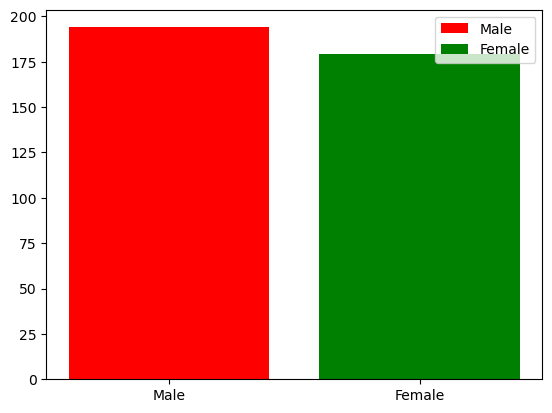

In [31]:
no_of_male = len(insured[insured['Gender'] == 'Male'])
no_of_female = len(insured[insured['Gender'] == 'Female'])

plt.bar(['Male','Female'],[no_of_male,no_of_female],color = ['r','g'],label = ['Male','Female'])
plt.legend()
plt.show()

{'Male': 194, 'Female': 179}


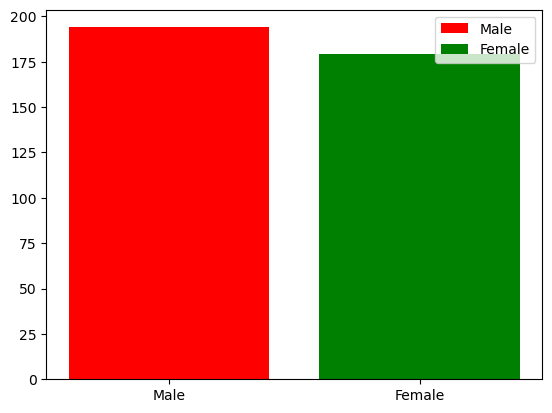

In [32]:
plot_data = dict(insured['Gender'].value_counts())#categorical  data lai count
print(plot_data)
plt.bar(['Male','Female'],[plot_data['Male'],plot_data['Female']],color = ['r','g'],label = ['Male','Female'])
plt.legend()
plt.show()

<Axes: xlabel='Gender'>

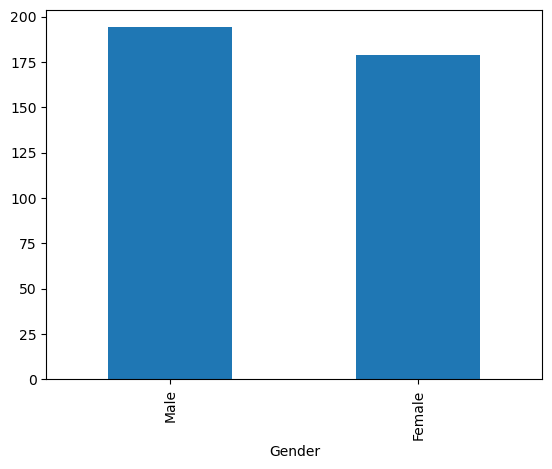

In [33]:
insured['Gender'].value_counts().plot.bar()# for quicker plot(value count)

<Axes: ylabel='count'>

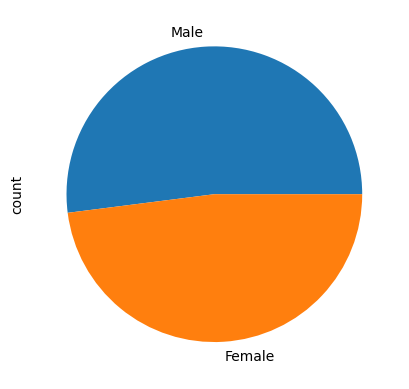

In [34]:
insured['Gender'].value_counts().plot.pie()

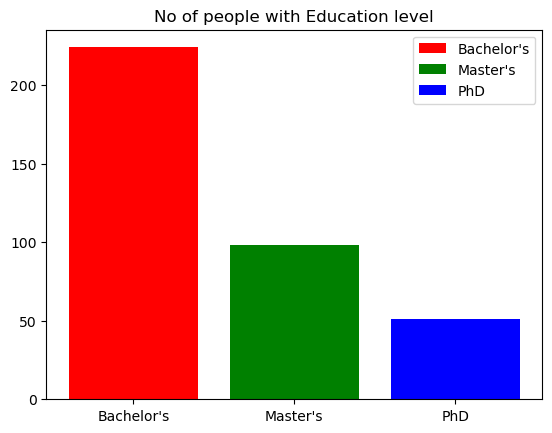

In [35]:
#Alternet
#for education level
no_of_bach = len(insured[insured['Education Level'] == "Bachelor's"])
no_of_mast = len(insured[insured['Education Level'] == "Master's"])
no_of_phd = len(insured[insured['Education Level'] == 'PhD'])

plt.bar(["Bachelor's","Master's","PhD"],[no_of_bach,no_of_mast,no_of_phd], color = ['r','g','b'], label=["Bachelor's","Master's","PhD"])
plt.title('No of people with Education level')
plt.legend()
plt.show()

In [36]:
plot_data.keys()

dict_keys(['Male', 'Female'])

In [37]:
plot_data.values()

dict_values([194, 179])

{"Bachelor's": 224, "Master's": 98, 'PhD': 51}


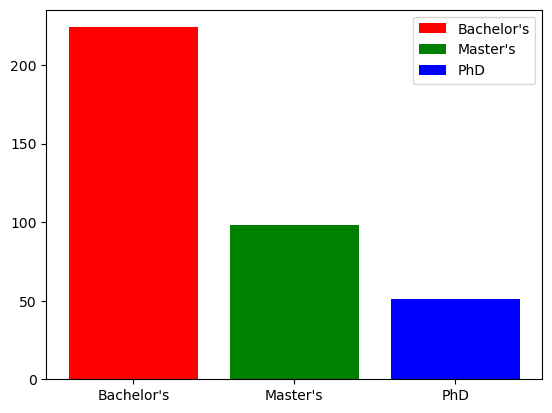

dict_keys(["Bachelor's", "Master's", 'PhD'])

In [38]:
plot_data = dict(insured['Education Level'].value_counts())
print(plot_data)
plt.bar(plot_data.keys(),plot_data.values(),color = ['r','g','b'],label = plot_data.keys())
plt.legend()
plt.show()
plot_data
plot_data.keys()

<Axes: xlabel='Education Level'>

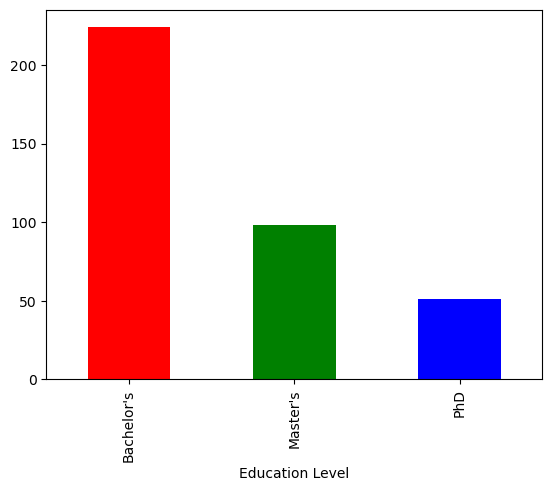

In [39]:
insured['Education Level'].value_counts().plot.bar(color = ['r','g','b'])

In [42]:
data = {}
list_col=  insured.select_dtypes(['category']).columns
print(list_col)
for i in range(len(list_col)):
  values = list(insured[list_col[i]].value_counts())
  subcategory = list(insured[list_col[i]].value_counts().index)
  # data['x'] = values
  data[list_col[i]] = [subcategory,values]
  # print(subcategory,values)

# print(data)

Index(['Gender', 'Education Level', 'Job Title'], dtype='object')


[["Bachelor's", "Master's", 'PhD'], [224, 98, 51]]


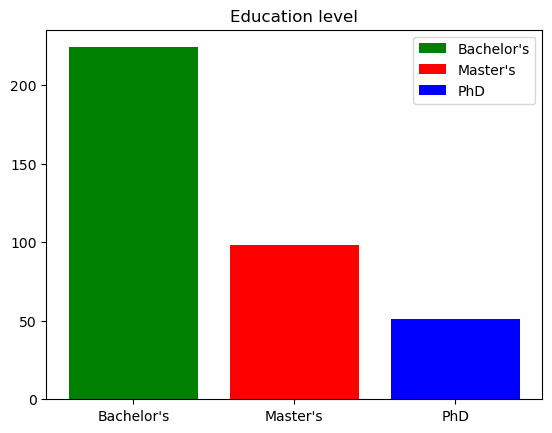

In [43]:
#Alternate
print(data['Education Level'])
plt.bar(data['Education Level'][0],data['Education Level'][1],
        label=data['Education Level'][0],
        color = ['g','r','b'])
plt.title('Education level')
plt.legend()
plt.show()

In [44]:
#bivariate
corr_insured = insured[['Age','Years of Experience','Salary']]

In [45]:
corr_insured.corr()

,Age,Years of Experience,Salary
Age,1.000000,0.979128,0.922335
Years of Experience,0.979128,1.000000,0.930338
Salary,0.922335,0.930338,1.000000


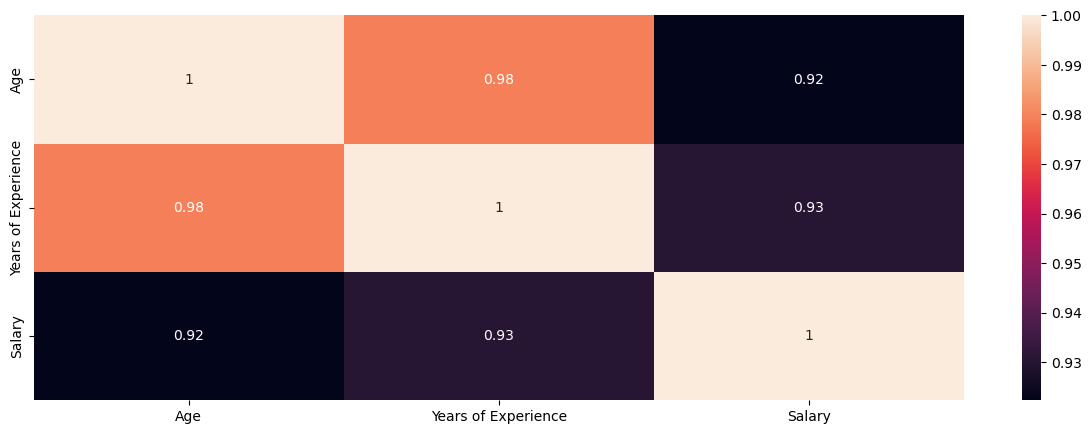

In [46]:
plt.figure(figsize=(15,5))
sns.heatmap(corr_insured.corr(),annot=True)
plt.show()

<Figure size 500x500 with 0 Axes>

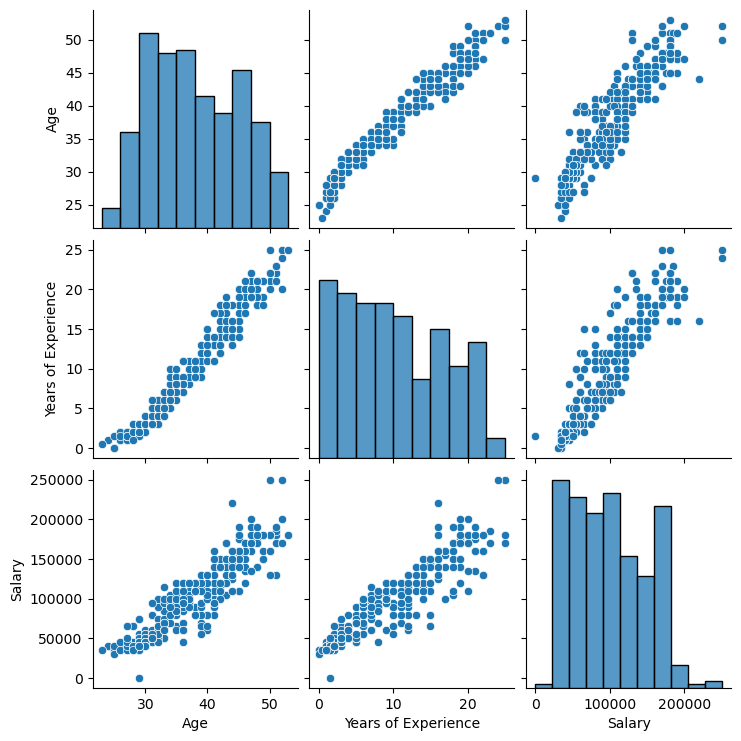

In [47]:
plt.figure(figsize=(5,5))
sns.pairplot(data=insured)
plt.show()

<Axes: xlabel='Education Level', ylabel='count'>

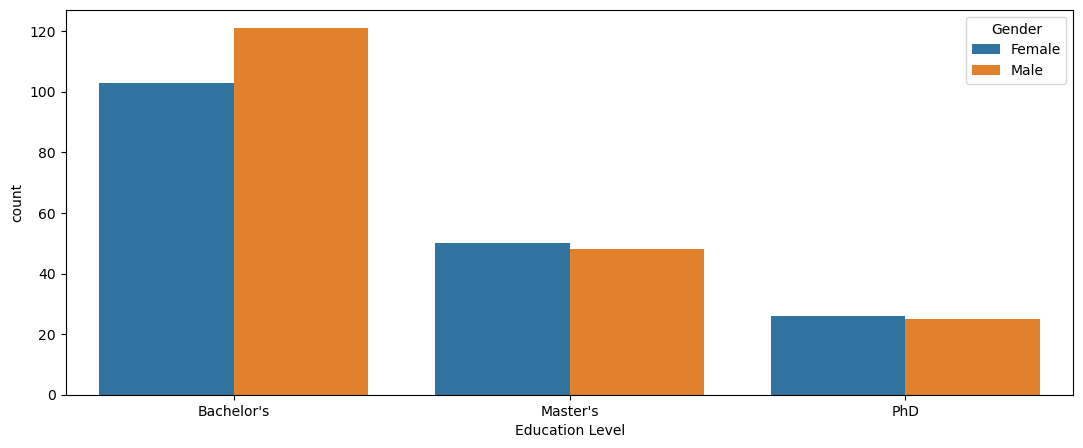

In [50]:
#Gender count plot
plt.figure(figsize=(13,5))
sns.countplot(x='Education Level',hue='Gender',data=insured)
# bar_perc(ax,insured['Education Level'])

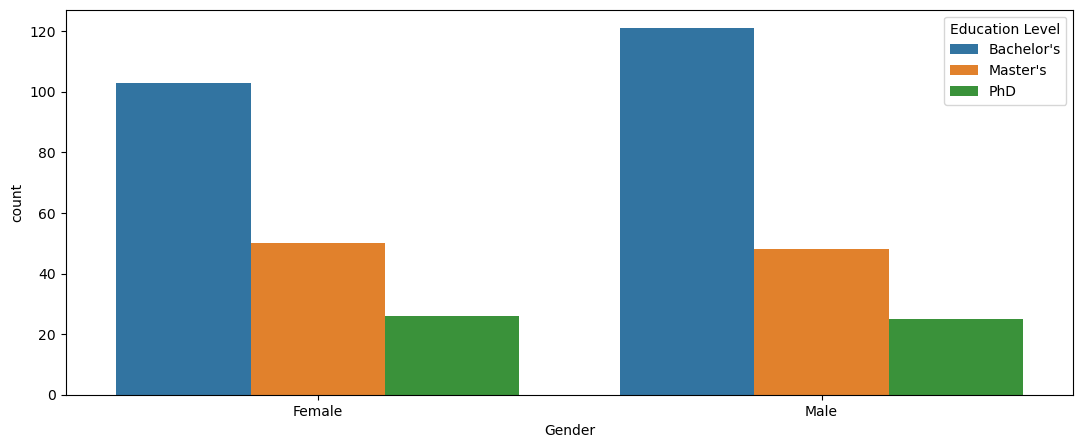

In [51]:
#Sex vs Education Level
plt.figure(figsize=(13,5))
ax=sns.countplot(x='Gender',hue='Education Level',data=insured)
# bar_perc(ax,insured['Education Level'])